# Show 3D NumPy array in [BigDataViewer](https://imagej.net/BigDataViewer)

Note that this notebook does not run on OSX! You can copy the contents of the relevant cells into a file and run the file through the `OSXAWTwrapper`:
```bash
WRAPPER="$(python -c 'import os; import site; print( os.path.join(site.getsitepackages()[0], "imglyb", "OSXAWTwrapper.py") )')"
python $WRAPPER /path/to/file
```
This example uses, in addition to imglyb, the *h5py* and *wget* packages. You can install them through conda:
```bash
conda install -c conda-forge h5py python-wget
```

The data used for this example is available on https://cremi.org.

In [1]:
import h5py
import os
import PIL
import wget

def load_or_download(name):
    # https://cremi.org
    
    target = os.path.join(os.path.expanduser('~'), 'Downloads', f'{name}.hdf')
    
    if not os.path.exists(target):
        source = f'https://cremi.org/static/data/{name}.hdf'.replace('+', '%2B')
        print(f'Sample {name} not found at {target}. Will download from {source} (this might take a few minutes)')
        wget.download(source, target)
        
    return h5py.File(target, 'r')['volumes/raw'][()]

In [2]:
import imglyb
import imglyb.util as util

name = 'sample_A_20160501'
data = load_or_download(name)
img  = imglyb.to_imglib(data)
data.shape

(125, 1250, 1250)

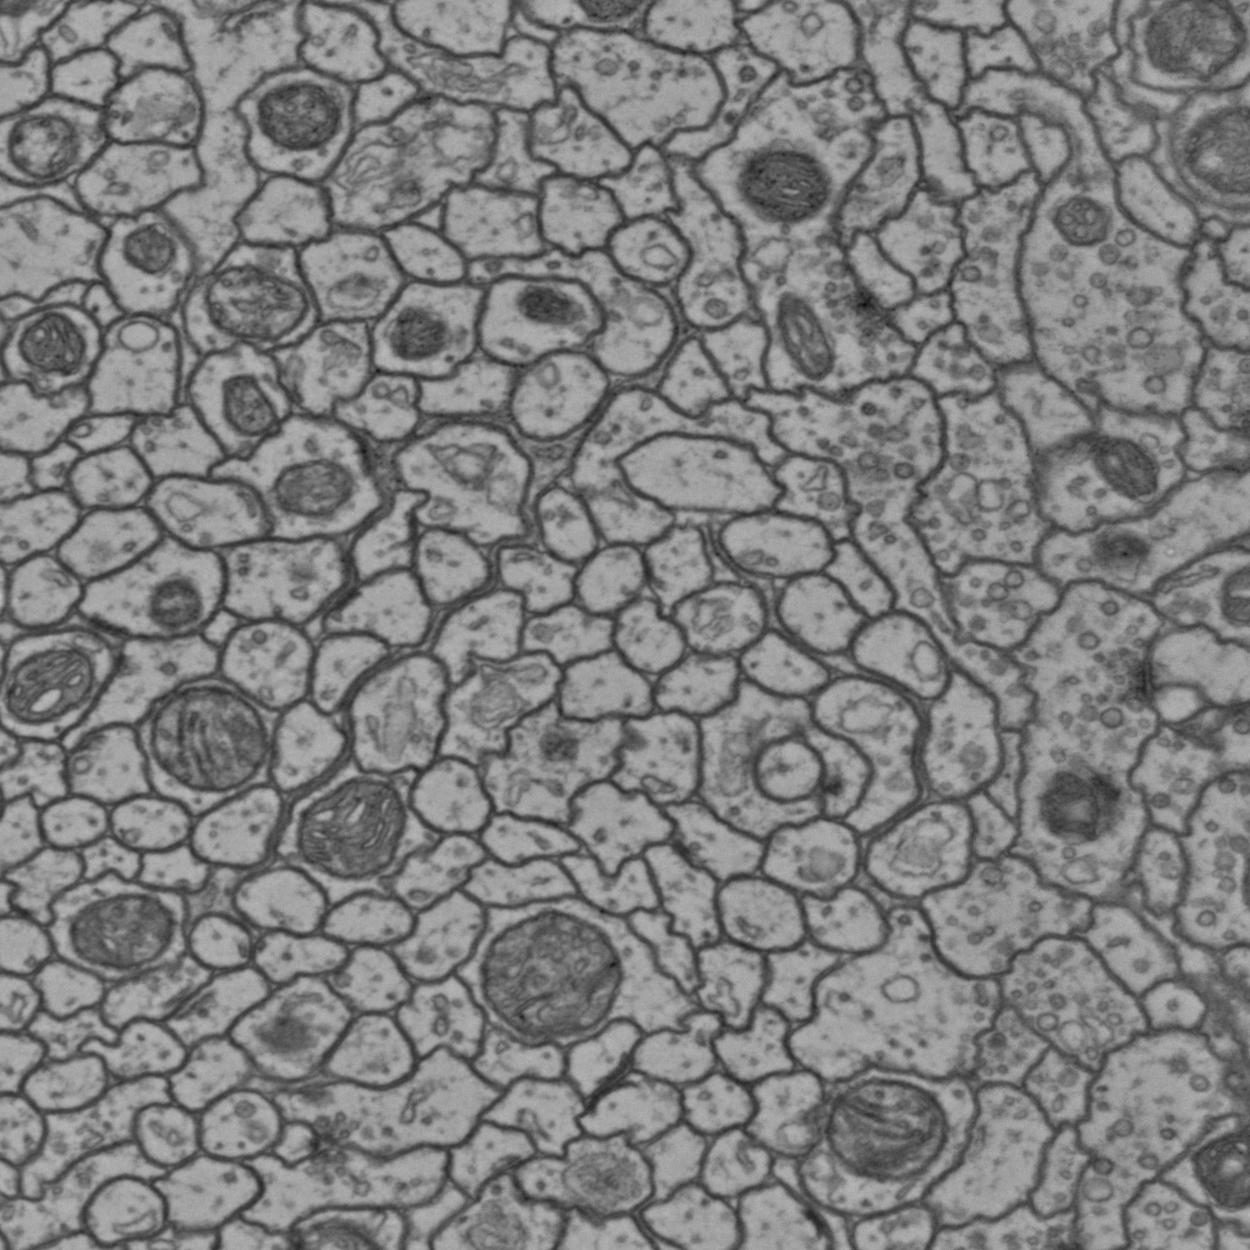

In [3]:
PIL.Image.fromarray(data[data.shape[0]//2, ...])

In [4]:
bdv = imglyb.util.BdvFunctions.show(img, name)

To prove that this is an actual shared-memory view into the NumPy array, the following cell overwrites a set of slices in the array with zeros and updates the BigDataViewer panel. The original data will not be available anymore and needs to be reloaded if desired. Zeroing out only some instead of all of the data was suggested by [Paul Ivanov](http://pirsquared.org) during my presentation at the [SciPy conference 2019](https://www.scipy2019.scipy.org).

In [5]:
data[30:90,...] = 0
bdv.getBdvHandle().getViewerPanel().requestRepaint()